In [1]:
import ma_codes as codes
from ma_codes import mysize, mymap, gray_red

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb
import re

## Some Plotting Parameters
plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams.update({'font.size': 14})
plt.rcParams['pdf.fonttype'] = 42
sb.set_style("ticks")

#pd.set_option("display.max_columns", 100)
sc.logging.print_version_and_date()

Running Scanpy 1.10.2, on 2024-09-04 21:55.


### Load preprocessed whole lung bleo object

In [2]:
object_folder = "/media/HDD_1/Janine/Aging_SingleCell/data_objects/"
adata = sc.read(object_folder + "230111_Bleo_Ageing_annotated_final.h5ad", cache = False)

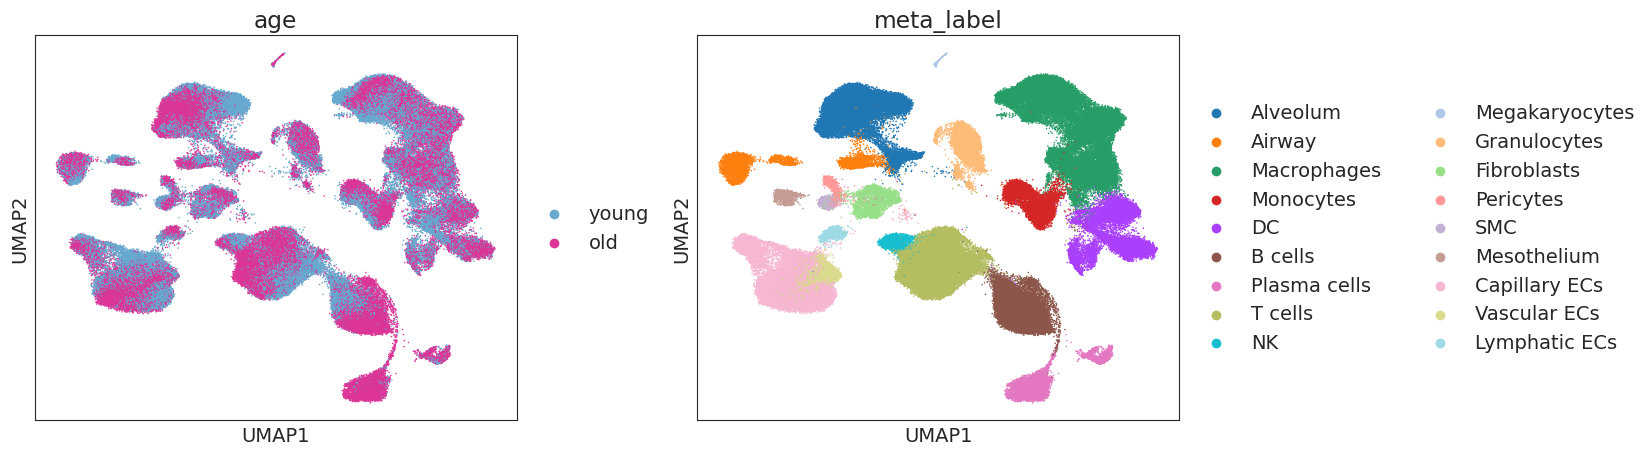

In [3]:
sc.pl.umap(adata, color = ["age", "meta_label"], size = 5, wspace = 0.25)

### Young vs Old Mice Results

In [4]:
#from ma_codes import path 
from os import listdir
tab_folder = "/media/HDD_1/Janine/Aging_SingleCell/data/DGE_data/dge_meta_label_young_vs_old/"

files = [f for f in listdir(tab_folder) if (".txt" in f)]
files

['diffxpy_young_vs_old_Pericytes_d30.txt',
 'diffxpy_young_vs_old_Fibroblasts_d30.txt',
 'diffxpy_young_vs_old_Fibroblasts_d3.txt',
 'diffxpy_young_vs_old_Macrophages_d20.txt',
 'diffxpy_young_vs_old_Granulocytes_d10.txt',
 'diffxpy_young_vs_old_SMC_d0.txt',
 'diffxpy_young_vs_old_B_cells_d37.txt',
 'diffxpy_young_vs_old_T_cells_d37.txt',
 'diffxpy_young_vs_old_T_cells_d3.txt',
 'diffxpy_young_vs_old_B_cells_d20.txt',
 'diffxpy_young_vs_old_Plasma_cells_d37.txt',
 'diffxpy_young_vs_old_Alveolum_d3.txt',
 'diffxpy_young_vs_old_Granulocytes_d30.txt',
 'diffxpy_young_vs_old_NK_d37.txt',
 'diffxpy_young_vs_old_Monocytes_d37.txt',
 'diffxpy_young_vs_old_NK_d30.txt',
 'diffxpy_young_vs_old_Plasma_cells_d0.txt',
 'diffxpy_young_vs_old_NK_d3.txt',
 'diffxpy_young_vs_old_NK_d20.txt',
 'diffxpy_young_vs_old_Macrophages_d3.txt',
 'diffxpy_young_vs_old_NK_d0.txt',
 'diffxpy_young_vs_old_Capillary_ECs_d20.txt',
 'diffxpy_young_vs_old_Lymphatic_ECs_d3.txt',
 'control_vs_bleo_regulated_genes_timepoin

In [5]:
cell_types = ['Alveolum','Airway','Macrophages','Monocytes','DC','B cells',
              'Plasma cells','T cells','NK','Granulocytes','Fibroblasts',
              'Pericytes','SMC','Mesothelium','Capillary ECs', 'Vascular ECs','Lymphatic ECs']

#### Order the files (to have nicer columns later on)

In [6]:
## Remember that you renamed some

bleo_order = adata.obs.meta_label.cat.categories

order = []
for ct in bleo_order:
    for d in ["d0", "d3", "d10", "d20", "d30", "d37"]:
        current = "diffxpy_young_vs_old_%s_%s.txt" %(ct.replace(" ", "_"), d) 
        if current in files:
            order.append(current)

## :)
print(len(files))
print(len(order))

106
102


In [7]:
order

['diffxpy_young_vs_old_Alveolum_d0.txt',
 'diffxpy_young_vs_old_Alveolum_d3.txt',
 'diffxpy_young_vs_old_Alveolum_d10.txt',
 'diffxpy_young_vs_old_Alveolum_d20.txt',
 'diffxpy_young_vs_old_Alveolum_d30.txt',
 'diffxpy_young_vs_old_Alveolum_d37.txt',
 'diffxpy_young_vs_old_Airway_d0.txt',
 'diffxpy_young_vs_old_Airway_d3.txt',
 'diffxpy_young_vs_old_Airway_d10.txt',
 'diffxpy_young_vs_old_Airway_d20.txt',
 'diffxpy_young_vs_old_Airway_d30.txt',
 'diffxpy_young_vs_old_Airway_d37.txt',
 'diffxpy_young_vs_old_Macrophages_d0.txt',
 'diffxpy_young_vs_old_Macrophages_d3.txt',
 'diffxpy_young_vs_old_Macrophages_d10.txt',
 'diffxpy_young_vs_old_Macrophages_d20.txt',
 'diffxpy_young_vs_old_Macrophages_d30.txt',
 'diffxpy_young_vs_old_Macrophages_d37.txt',
 'diffxpy_young_vs_old_Monocytes_d0.txt',
 'diffxpy_young_vs_old_Monocytes_d3.txt',
 'diffxpy_young_vs_old_Monocytes_d10.txt',
 'diffxpy_young_vs_old_Monocytes_d20.txt',
 'diffxpy_young_vs_old_Monocytes_d30.txt',
 'diffxpy_young_vs_old_Monocyte

In [8]:
", ".join(order[:20])

'diffxpy_young_vs_old_Alveolum_d0.txt, diffxpy_young_vs_old_Alveolum_d3.txt, diffxpy_young_vs_old_Alveolum_d10.txt, diffxpy_young_vs_old_Alveolum_d20.txt, diffxpy_young_vs_old_Alveolum_d30.txt, diffxpy_young_vs_old_Alveolum_d37.txt, diffxpy_young_vs_old_Airway_d0.txt, diffxpy_young_vs_old_Airway_d3.txt, diffxpy_young_vs_old_Airway_d10.txt, diffxpy_young_vs_old_Airway_d20.txt, diffxpy_young_vs_old_Airway_d30.txt, diffxpy_young_vs_old_Airway_d37.txt, diffxpy_young_vs_old_Macrophages_d0.txt, diffxpy_young_vs_old_Macrophages_d3.txt, diffxpy_young_vs_old_Macrophages_d10.txt, diffxpy_young_vs_old_Macrophages_d20.txt, diffxpy_young_vs_old_Macrophages_d30.txt, diffxpy_young_vs_old_Macrophages_d37.txt, diffxpy_young_vs_old_Monocytes_d0.txt, diffxpy_young_vs_old_Monocytes_d3.txt'

### Tidy - Concatenate DGE Tables for all cell types

In [9]:
## Concatenate all Tables
files = [f for f in listdir(tab_folder) if (".txt" in f)]

files = order    ## set above for nicer column ordering
xlabel = "age"

all_tabs = pd.DataFrame()
cols = ["pval", "log2fc", "pct.young", "pct.old", "cell_type"]

for file in files:
    tab = pd.read_csv(tab_folder + file, sep = "\t", index_col = 0)
    
    row = re.split("young_vs_old_", re.split("\.", file)[0])[1]
    ct = re.sub("_d[\d]+", "", row).replace("_", " ")
    time = re.findall("_d[\d]+", file)[0].replace("_", "")
    
    tab["cell_type"] = row
    tab = tab.loc[:, cols].copy()

    ## Don’t have to explicitly add d0, as dge was calculated within that time point as well
    cells = (adata.obs.meta_label == ct) & (adata.obs.time_point == time)
    
    genExp = pd.DataFrame(adata[cells, tab.index].X.todense(), index = adata[cells].obs_names, columns = tab.index)
    genExp[xlabel] = adata[cells].obs.loc[:, xlabel]
    means = pd.DataFrame(genExp.groupby([xlabel]).mean().transpose())
    means.columns = ["avgExpr_%s" %col for col in means.columns]    ## cell type will be added anyways
    tab = pd.concat([tab, means.loc[tab.index]], axis = 1)

    all_tabs = pd.concat([all_tabs, tab], axis = 0)
    print("Concatenated %s\t%s x %s" %(row, all_tabs.shape[0], all_tabs.shape[1]))

Concatenated Alveolum_d0	3102 x 7
Concatenated Alveolum_d3	8253 x 7
Concatenated Alveolum_d10	13625 x 7
Concatenated Alveolum_d20	18371 x 7
Concatenated Alveolum_d30	23471 x 7
Concatenated Alveolum_d37	27246 x 7
Concatenated Airway_d0	33293 x 7
Concatenated Airway_d3	40627 x 7
Concatenated Airway_d10	47409 x 7
Concatenated Airway_d20	53662 x 7
Concatenated Airway_d30	60635 x 7
Concatenated Airway_d37	66648 x 7
Concatenated Macrophages_d0	70666 x 7
Concatenated Macrophages_d3	76403 x 7
Concatenated Macrophages_d10	81985 x 7
Concatenated Macrophages_d20	86573 x 7
Concatenated Macrophages_d30	91948 x 7
Concatenated Macrophages_d37	95975 x 7
Concatenated Monocytes_d0	99955 x 7
Concatenated Monocytes_d3	103814 x 7
Concatenated Monocytes_d10	107353 x 7
Concatenated Monocytes_d20	110442 x 7
Concatenated Monocytes_d30	114302 x 7
Concatenated Monocytes_d37	117561 x 7
Concatenated DC_d0	121606 x 7
Concatenated DC_d3	126737 x 7
Concatenated DC_d10	131270 x 7
Concatenated DC_d20	135075 x 7
Concate

In [10]:
from statsmodels.stats.multitest import multipletests

## Multiple Testing Corretion and Pivot into final Master Table
all_tabs["pval_adj"] = multipletests(all_tabs["pval"], method = "fdr_bh")[1]

all_tabs = all_tabs.pivot(columns = "cell_type")  ## uses index by default
cols = ["%s_%s" %(all_tabs.columns.get_level_values(0)[i], all_tabs.columns.get_level_values(1)[i])
        for i in range(len(all_tabs.columns.values))]
all_tabs.columns = cols

## Do not add a percentage per cell type column additional (after concatenating and pivoting all)
#all_tabs = codes.add_pct(adata[cells], all_tabs, gene_label = "index", group_by = "cell_type",
#                         ids = adata.obs.loc[:, "cell_type"].cat.categories)

## Add extra columns for easier Filtering
all_tabs["max_pct"] = (all_tabs.filter(like = "pct.")).max(axis = 1)

qval_thresh = 0.05
all_tabs["significant_in_nr"] = (all_tabs.filter(like = "pval_adj") < qval_thresh).sum(1)
tmp = all_tabs.filter(like = "pval_adj") < qval_thresh
all_tabs["significant_in"] = [", ".join(c.replace("pval_adj_", "") 
                                        for c in all_tabs.filter(like = "pval_adj").columns[tmp.loc[i]])
                                for i in tmp.index]
print(all_tabs.shape)
all_tabs.head(3)

(13201, 717)


,pval_Airway_d0,pval_Airway_d10,pval_Airway_d20,pval_Airway_d3,pval_Airway_d30,pval_Airway_d37,pval_Alveolum_d0,pval_Alveolum_d10,pval_Alveolum_d20,pval_Alveolum_d3,...,pval_adj_T_cells_d37,pval_adj_Vascular_ECs_d0,pval_adj_Vascular_ECs_d10,pval_adj_Vascular_ECs_d20,pval_adj_Vascular_ECs_d3,pval_adj_Vascular_ECs_d30,pval_adj_Vascular_ECs_d37,max_pct,significant_in_nr,significant_in
gene,,,,,,,,,,,,,,,,,,,,,
0610009B22Rik,NaN,0.422219,0.459017,0.004435,0.669698,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098113,1,Airway_d3
0610009E02Rik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051020,1,Lymphatic_ECs_d30
0610009L18Rik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060870,0,


In [11]:
#pd.set_option("display.max_columns", 100)
all_tabs.significant_in_nr.value_counts().reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
significant_in_nr,0,1,2,3,4,5,6,7,8,9,...,60,59,47,46,62,65,37,53,54,40
count,3676,2606,1722,1280,871,657,495,386,299,217,...,1,1,1,1,1,1,1,1,1,1


In [12]:
all_tabs.loc[["Krt8", "Lcn2", "Lgals3"]].filter(regex = "Alveolum|significant")

,pval_Alveolum_d0,pval_Alveolum_d10,pval_Alveolum_d20,pval_Alveolum_d3,pval_Alveolum_d30,pval_Alveolum_d37,log2fc_Alveolum_d0,log2fc_Alveolum_d10,log2fc_Alveolum_d20,log2fc_Alveolum_d3,...,avgExpr_old_Alveolum_d30,avgExpr_old_Alveolum_d37,pval_adj_Alveolum_d0,pval_adj_Alveolum_d10,pval_adj_Alveolum_d20,pval_adj_Alveolum_d3,pval_adj_Alveolum_d30,pval_adj_Alveolum_d37,significant_in_nr,significant_in
gene,,,,,,,,,,,,,,,,,,,,,
Krt8,0.0,2.220446e-16,0.947846,2.813845e-10,0.351544,0.000702,-0.441477,-0.853381,0.007202,-0.437597,...,0.346564,0.277621,0.0,1.865444e-14,0.981862,1.632959e-08,0.649227,0.010648,5,"Airway_d37, Alveolum_d0, Alveolum_d10, Alveolu..."
Lcn2,0.0,2.220446e-16,0.000000,0.000000e+00,0.000000,0.124853,0.678115,0.837308,0.961702,0.522521,...,1.771639,0.746981,0.0,1.865444e-14,0.000000,0.000000e+00,0.000000,0.385362,8,"Alveolum_d0, Alveolum_d10, Alveolum_d20, Alveo..."
Lgals3,NaN,4.257396e-04,0.834606,NaN,NaN,NaN,NaN,-0.974482,0.080535,NaN,...,NaN,NaN,NaN,7.107656e-03,0.937643,NaN,NaN,NaN,13,"Alveolum_d10, DC_d0, DC_d20, DC_d30, Granulocy..."


In [13]:
all_tabs.loc[['Acta2', 'Aspn', 'Cthrc1', "Spp1", 'Tgfbi','Krt8'], ["significant_in_nr", "significant_in"]]

,significant_in_nr,significant_in
gene,,
Acta2,3,"Fibroblasts_d20, Pericytes_d10, Pericytes_d20"
Aspn,0,
Cthrc1,0,
Spp1,6,"Macrophages_d0, Macrophages_d10, Macrophages_d..."
Tgfbi,10,"DC_d10, DC_d3, Granulocytes_d30, Macrophages_d..."
Krt8,5,"Airway_d37, Alveolum_d0, Alveolum_d10, Alveolu..."


In [14]:
## Remove the ones not significant in any comparison and save Table
print(all_tabs.shape)

out_folder = "/media/HDD_1/Janine/Aging_SingleCell/data/DGE_data/dge_meta_label_young_vs_old/"

all_tabs.to_csv(out_folder + "diffxpy_all_control_vs_bleo_timepoints_meta_label_young_vs_old_unfiltered.txt", sep = "\t")

(13201, 717)


In [15]:
## Remove the ones not significant in any comparison and save Table
all_tabs = all_tabs[all_tabs.significant_in_nr > 0].copy()
print(all_tabs.shape)

out_folder = "/media/HDD_1/Janine/Aging_SingleCell/data/DGE_data/dge_meta_label_young_vs_old/"

all_tabs.to_csv(out_folder + "diffxpy_all_control_vs_bleo_timepoints_meta_label_young_vs_old_filtered.txt", sep = "\t")

(9525, 717)


### Export upregulated gene lists


In [29]:
 ## Not considering "expressed in at least x mice" in mouse data sets.

def export_gene_table(tab, baseline = "young", condition = "old", qval_thresh = 0.05, pct_thresh = 0.05, cts = None):
    
    genetab = pd.DataFrame(columns = ["genes_logfc_05", "genes_logfc_1", "genes_logfc_2"])
    
    for ct in cts:
        tab_ct = tab.filter(regex = ct.replace("+", "\+")).copy()

        tab_up = tab_ct[(tab_ct.loc[:, "pval_adj_%s" %ct] < qval_thresh) & 
                        #(tab_ct.loc[:, "%s_count_%s" %(condition, ct)] > ds_thresh) &
                        (tab_ct.loc[:, "pct.%s_%s" %(condition, ct)] > pct_thresh)].copy()
        
        tab_down = tab_ct[(tab_ct.loc[:, "pval_adj_%s" %ct] < qval_thresh) & 
                          #(tab_ct.loc[:, "PBS_count_%s" %ct] > mouse_thresh) &
                          (tab_ct.loc[:, "pct.%s_%s" %(baseline, ct)] > pct_thresh)].copy()   
        cur_upgenes = []
        cur_downgenes = []

        for log_thresh in [0.5, 1, 2]:
            up_genes = tab_up[tab_up.loc[:, "log2fc_%s" %ct] > log_thresh].sort_values("pval_adj_%s" %ct).index.values
            down_genes = tab_down[tab_down.loc[:, "log2fc_%s" %ct] < -log_thresh].sort_values("pval_adj_%s" %ct).index.values

            cur_upgenes = cur_upgenes + [",".join(up_genes)]
            cur_downgenes = cur_downgenes + [",".join(down_genes)]

        genetab.loc["%s_up" %ct] = cur_upgenes
        genetab.loc["%s_down" %ct] = cur_downgenes

    return genetab

In [30]:
 #cts = [f.split(".")[0].split("_vs_")[1].replace("ILD_", "") for f in files]
cts = [re.split("young_vs_old_", re.split("\.", f)[0])[1] for f in files]
", ".join(cts[:20])

'Alveolum_d0, Alveolum_d3, Alveolum_d10, Alveolum_d20, Alveolum_d30, Alveolum_d37, Airway_d0, Airway_d3, Airway_d10, Airway_d20, Airway_d30, Airway_d37, Macrophages_d0, Macrophages_d3, Macrophages_d10, Macrophages_d20, Macrophages_d30, Macrophages_d37, Monocytes_d0, Monocytes_d3'

In [18]:
genetab = export_gene_table(all_tabs, baseline = "young", condition = "old", qval_thresh = 0.05,
                            pct_thresh = 0.1, cts = cts)
genetab.shape

(204, 3)

In [19]:
genetab.head(4)

,genes_logfc_05,genes_logfc_1,genes_logfc_2
Alveolum_d0_up,"Acot1,Trf,Rps28,Nrn1,Lrg1,mt-Cytb,Itih4,Lcn2,H...","H2-D1,H2-K1",
Alveolum_d0_down,"Anp32b,CT010467.1,Dst,Gm42418,Hnrnpa3,Macf1,Sp...",CT010467.1,
Alveolum_d3_up,"H2-Q7,H2-K1,mt-Nd4,Lcn2,Lrg1,Ly6i,Nrn1,Pigr,Pr...","H2-Q7,Nrn1,Pigr,mt-Co1,Fmo2",
Alveolum_d3_down,"Tspan8,Tpm3,Gm42418,Rps24,Hnrnpu,Hsp90aa1,Hsp9...","Gm42418,Rps24,Tspan8,Perp,Areg,Tuba1b,Gdf15,Isg15",Gm42418


In [20]:
genetab.loc["Alveolum_d37_up", "genes_logfc_05"]

'mt-Rnr2,Alcam,mt-Rnr1,Calm1,Chil1,Resf1,Ccdc141,Mme,Limch1,Chia1,Secisbp2l,Wapl,Fabp5,Ash1l,Apc,Klf9,Ppp1r14c,Nrn1,Rb1cc1,Nexmif,Wwp1,Itih4,Malt1,Cux1,Dnajc3,H2-K1,Bend7,H2-D1,Zfp445,Mpp5,Smarca5,Col4a3bp,Chmp4c,Ndnf,Gprin3,Spink5,Ttn,Pura,C6,Clu,Rprm,Fam184a,Krt7,Lpp,N4bp2l2,Ubr1,Pkm,Ube3a,Slc25a4,Cspp1,Bex4,Cdc42,Ahnak,Mvp,Cdk12,Filip1l,Inka2,Eif4g3,Zfand5,Hbegf,Uqcrb,Pdcd5,Psmd11,Bcap29,Cct2,Miga1,Cyp2b10,Rps23,Capzb,Tmem176b,Tfdp2,Pnpla8,Ptpn11,Eci2,Ybx1,Itgb6,Celf1,Rab27b,Pdzd8,Pof1b,Psmc2,Myo1b,Sparc,Specc1,Ceacam1,Ndufb6,Psmd1,Rps5'

In [21]:
genetab.loc["Fibroblasts_d37_up", "genes_logfc_05"]

'2610044O15Rik8,Zfp74,Slc16a9,Pdcd10,Eef1akmt2,Fam160b1,Ago1,mt-Rnr1,mt-Rnr2,Iigp1,Man2a1,Col1a2,Fstl1,Eprs,Ckap4,Nedd4,Vim,Ccnd1,Nrcam,Cdc42bpa,Loxl2,Calm1,Aggf1,Cp'

In [22]:
## Save these lists
genetab.to_csv(out_folder + "control_vs_bleo_regulated_genes_timepoints_meta_label_young_vs_old.txt", sep = "\t")